In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\student\scikit_learn_data


In [48]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [37]:
faces.keys()
faces.data.shape  # 400 4096

range(len(faces.data))

# 출력할 이미지의 번호를 랜덤하게 생성해 저장
klist = np.random.choice(range(len(faces.data)), 10)

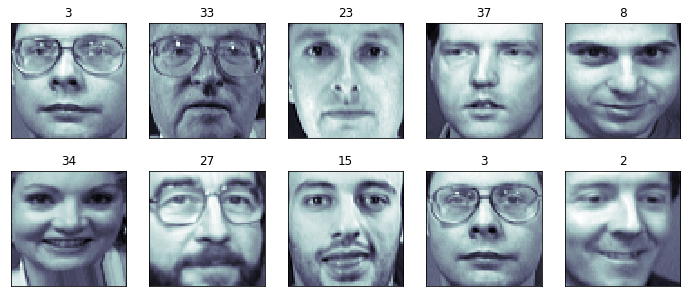

In [50]:
fig = plt.figure(figsize=(12,5))

# 2줄, 5칸 나누어 얼굴 이미지(klist) 출력
for i in range(2):
    for j in range(5):
        k = klist[i*5+j]
        ax = fig.add_subplot(2, 5, i*5+j+1)
        ax.imshow(faces.images[k], cmap = plt.cm.bone)
        plt.title(faces.target[k])
        # 축에 숫자 제거
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])
plt.show()

In [67]:
# 트레인 테스트 데이터 분할
xtrain, xtest, ytrain, ytest = train_test_split(faces.data, faces.target, train_size = 0.6, random_state = 0)

In [113]:
# SVM 모델 생성
model = SVC(kernel='linear').fit(xtrain, ytrain)

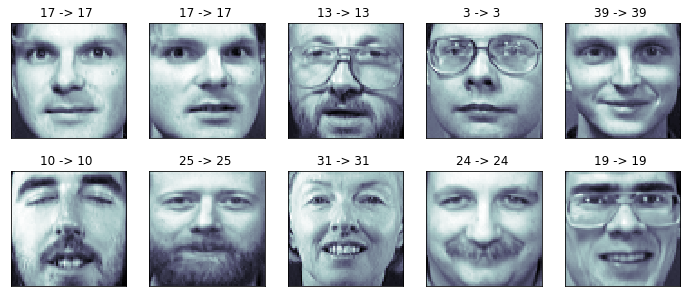

In [114]:
fig = plt.figure(figsize=(12,5))

klist = np.random.choice(range(len(ytest)), 10)

# 2줄, 5칸 나누어 얼굴 이미지(klist) 출력
for i in range(2):
    for j in range(5):
        k = klist[i*5+j]
        ax = fig.add_subplot(2, 5, i*5+j+1)
        ax.imshow(xtest[k:(k+1),:].reshape(64,64), cmap = plt.cm.bone)
        plt.title('%d -> %d '%(ytest[k], model.predict(xtest[k:(k+1),:])))
        # 축에 숫자 제거
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])
plt.show()

In [101]:
# 모델 평가 및 성능향상 패키지
from sklearn.metrics import classification_report, accuracy_score

In [115]:
ypredtrain = model.predict(xtrain)
ypredtest = model.predict(xtest)

In [119]:
print(classification_report(ytrain,ypredtrain))
print(classification_report(ytest,ypredtest, ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [124]:
# confusion matrix(분류 평가표)
# : 실제와 예측이 일치하는 개수 

from sklearn.metrics import confusion_matrix

xtrue = [2,0,2,2,0,1]
xpred = [0,0,2,2,0,2]

confusion_matrix(xtrue, xpred)
# 행(정답) / 열(예측)
# array([[2, 0, 0],  정답 0, 예측 0 / 정답 0 예측 1 / 정답 0 예측 2
#        [0, 0, 1],  정답 1, 예측 0 / 정답 1 예측 1 / 정답 1 예측 2
#        [1, 0, 2]]  정답 2, 예측 0 / 정답 2 예측 1 / 정답 2 예측 2

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [135]:
xtrue = [1,0,1,1,0,1]
xpred = [0,0,1,1,0,1]

confusion_matrix(xtrue,xpred, labels=[1,0])

# 양성 : 0 / 음성 : 1
# array([[3, 1],  TT , TF
#        [0, 2]   FT , FF

array([[3, 1],
       [0, 2]], dtype=int64)

In [128]:
confusion_matrix(xtrue,xpred)

array([[2, 0],
       [1, 3]], dtype=int64)

# 평가점수
- confusion-matrix로부터평가점수를 계산
- 정확도, 정밀도, f점수, 재현율, 위양성율

1. 정확도 : 전체 샘플 중 맞게 예측한 샘플 비율
   -> (TP+TN)/ (TP+TN+FP+FN)
2. 정밀도 (precision) : 양성클래스에 속한다고 예측한 샘플 중에서 실제로 양성클래스에 속하는 샘플의 비율
   -> (TP) / (TP + FP)
3. 재현율 : 실제 양성 샘플 중 양성이라고 예측한 샘플의 비율
   -> (TP) / (TP + FN)
4. 위양성율 : 음성클래스에 속한다고 예측한 샘플 중에서 실제로 음성클래스에 속하는 샘플의 비율
   -> (FP) / (FP + TN)
5. F-점수 (조화평균)  / Fb (b(가중치) = 1(default))
   F1-> 2*precision*recall / (precision+recall)

In [137]:
xtrue = [0,0,0,1,1,0,0]
xpred = [0,0,0,0,1,1,1]
print(classification_report(xtrue, xpred))
'''
0이라고 예측한 데이터의 75%만 실제로 0이었음.
1이라고 예측한 데이터의 33%만 실제로 1이었음.
실제 0인 데이터 중의 60%만 0으로 판별됨
실제 1인 데이터 중의 50%만 1로 판별됨
'''


              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [140]:
pd.DataFrame(confusion_matrix(xtrue,xpred))

,0,1
0,3,2
1,1,1


# 가중치

### 가중치 업데이트
Wi = Wi + LR * E * Xi

### 에포크
가중치 업데이트를 몇 회 할 것인가

### 배치사이즈
한 번에 몇 개의 데이터를 읽고 업데이트 할 것인가 

In [143]:
import math
math.e

2.718281828459045

In [157]:
# sigmoid함수 구현
def mysig(x):
    return 1/(1+(math.e**-x))
    
# reLu 함수 구현
def myRelu(x):
    if x <=0:
        x = 0
    return x

# step function 구현
def myStep(x):
    if x < 0:
        x -= 1
    x = int(x)
    return x

In [163]:
print(mysig(8))
print(myRelu(4))
print(myStep(-1.5))
print(myStep(-0.5))
print(myStep(0.5))
print(myStep(0.5))
print(myStep(1.5))

0.9996646498695336
4
-2
-1
0
0
1
